# Perceived Ability and Actual Performance: A Study on Scientific Literacy
#### An Empirical Analysis of Confidence, Competence, and Scientific Literacy in Undergraduate Students.
**Author:** Lauren Heaps
**Date:** June 2025

## Overview
Using the pre- and post- assessment scores of students regarding their self-perceived scientific literacy and testable scientific literacy, this study aimed to answer a simple question: is there a relationship between the way students score themselves and the way they perform?

In [1]:
# Data Import
library(readxl)         # To read Excel files

# Data Manipulation
library(dplyr)          # Data transformation (mutate, filter, etc.)

# Descriptive Statistics
library(psych)          # Descriptive statistics (mean, sd, describe, etc.)
library(effsize)        # Effect size metrics (e.g., Cohen's d)

# Visualization
library(ggplot2)        # Data visualization

# Regression & Modeling
library(betareg)        # Beta regression (standard)
library(glmmTMB)        # Generalized linear mixed models (incl. beta regression)
library(lme4)           # Linear and generalized mixed-effects models

# Model Evaluation & Diagnostics
library(car)            # Diagnostic tools (e.g., VIF, residual plots)
library(performance)    # Pseudo R², ICC, residual checks, etc.
library(MuMIn)          # Model selection (AIC, dredge)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'effsize'


The following object is masked from 'package:psych':

    cohen.d



Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: Matrix

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:psych':

    logit


The following object is masked from 'package:dplyr':

    recode




## Data
This study is about two sections of an intro Biology course, taught by the same professor in the same semester. Total, there are 399 students that provided consent for their responses to be used in this study. Two assessments were administered: a pre assessment at the beginning of the year, and a post assessment at the end of the semester. The first assessment was a TOSLS 28-question multiple-choice test focused on three BLS (Breadth of Life Science) course objectives. The second assessment was a Likert-scale self-assessment to determine self-perception of scientific literacy.

In [7]:
## Load data
df <- read_excel("C:/Users/laure/Desktop/scientific_literacy/for_jupyter/data.xlsx",
                 sheet="Sheet1")

# Descriptive statistics for overall understanding of data
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,399,200.000000,115.3256259,200.000,200.000000,148.260000,1.0,399,398.0,0.00000000,-1.2090262,5.77350269
Section,2,399,2.588972,0.4926380,3.000,2.610592,0.000000,2.0,3,1.0,-0.36030290,-1.8748619,0.02466275
pre TOSLS score,3,398,16.082915,5.3493246,16.000,16.268750,5.930400,0.0,27,27.0,-0.31224792,-0.3908002,0.26813742
pre SELF - Q1,4,397,3.629723,0.7794217,4.000,3.617555,1.482600,0.0,5,5.0,-0.40224669,0.9425843,0.03911805
pre SELF - Q2,5,397,3.435768,0.9369142,4.000,3.454545,1.482600,1.0,5,4.0,-0.37453194,-0.1436378,0.04702238
pre SELF - Q3,6,397,4.037783,0.7920585,4.000,4.103448,0.000000,1.0,5,4.0,-0.73595038,0.7172071,0.03975228
pre SELF - Q4,7,397,3.634761,0.8134605,4.000,3.642633,1.482600,1.0,5,4.0,-0.22711892,-0.1507906,0.04082641
pre SELF - Q5,8,397,3.450882,0.8851927,3.000,3.451411,1.482600,1.0,5,4.0,-0.13474916,-0.3783282,0.04442655
pre SELF - Q6,9,397,3.430730,0.9838918,3.000,3.442006,1.482600,1.0,5,4.0,-0.16418131,-0.5067559,0.04938012


## Data Cleaning
Because the analyses involved paired pre- and post-assessment data, some tests required complete responses across all items. Wherever possible, all available data were included. Specifically, for analyses based on paired summary scores (e.g., overall TOSLS percentages or SELF scale averages), only assessments with complete responses were included. This applies to analyses such as paired t-tests and correlation analyses, where incomplete assessments (even if missing only one item) were excluded. For analyses conducted at the individual item level (e.g., comparisons of specific SELF items), we included all available responses. In these cases, incomplete assessments were still used, and only the specific unanswered items were excluded. This approach maximized the use of available data while maintaining the integrity of analyses that required fully paired responses.

It was also critical to center the Likert-scale responses to a scale of -1 to 1, instead of 1 to 5. This allowed for a better depiction of the center value of the scale for later data analysis.

The final step of the data cleaning was initializing variables to store the TOSLS results as percentages, rather than the raw scores.

In [9]:
# Standardization of variables
df.std <- df
df.std$`post SELF average` <- c(scale(df$`post SELF average`))
df.std$`pre SELF average` <- c(scale(df$`pre SELF average`))
df.std$`post TOSLS score` <- c(scale(df$`post TOSLS score`))
df.std$`pre TOSLS score` <- c(scale(df$`pre TOSLS score`))


## Likert Transformation (Centered between -1 and 1)
transform_likert <- function(x) {
  return((x - 3) / 2)
}

pre_questions <- paste0("pre SELF -  Q", 1:8)
post_questions <- paste0("post SELF -  Q", 1:8)

## Apply the transformation for centering Likert-scale data
df.std <- df %>%
  mutate(across(all_of(pre_questions), transform_likert)) %>%
  mutate(across(all_of(post_questions), transform_likert))

# Calculate delta (change in scores)
df.std$delta_self <- df.std$`post SELF average` - df.std$`pre SELF average`
df.std$delta_test <- df.std$`post TOSLS score` - df.std$`pre TOSLS score`

# Calculate delta of percentages
df.std$delta_test_percent <- df.std$delta_test/28

# Calculate percentages of post scores (absolute values, out of 28)
df.std$perc_test_post <- df.std$`post TOSLS score`/28
df.std$perc_test_pre <- df.std$`pre TOSLS score`/28

# Convert 0's and 1's to be slightly shifted
df.std$perc_test_post[df.std$perc_test_post == 0] <- 0.0005
df.std$perc_test_post[df.std$perc_test_post == 1] <- 0.9995

## Exploratory Data Analysis
We begin by examining the distributions of the data. The pre TOSLS assessment followed an approximate Beta distribution. The distribution showed a negative shew around the mean of 16.1 (SD=5.3). The post TOSLS assessment had a Beta distribution, highlighting a peak near the mean of 18.4 and long tail off to the left. The standard deviation for this data was 5.1, demonstrating substantial variety between the possible 0-28 points. 

 The pre SELF assessment followed a distribution similar to the TOSLS assessments, though with a stronger centralization near the mean of 3.5 and a small tail created by the standard deviation of 0.6. The post SELF assessment also followed a Beta distribution, centered around the mean of 4.1 with a standard deviation of 0.6.

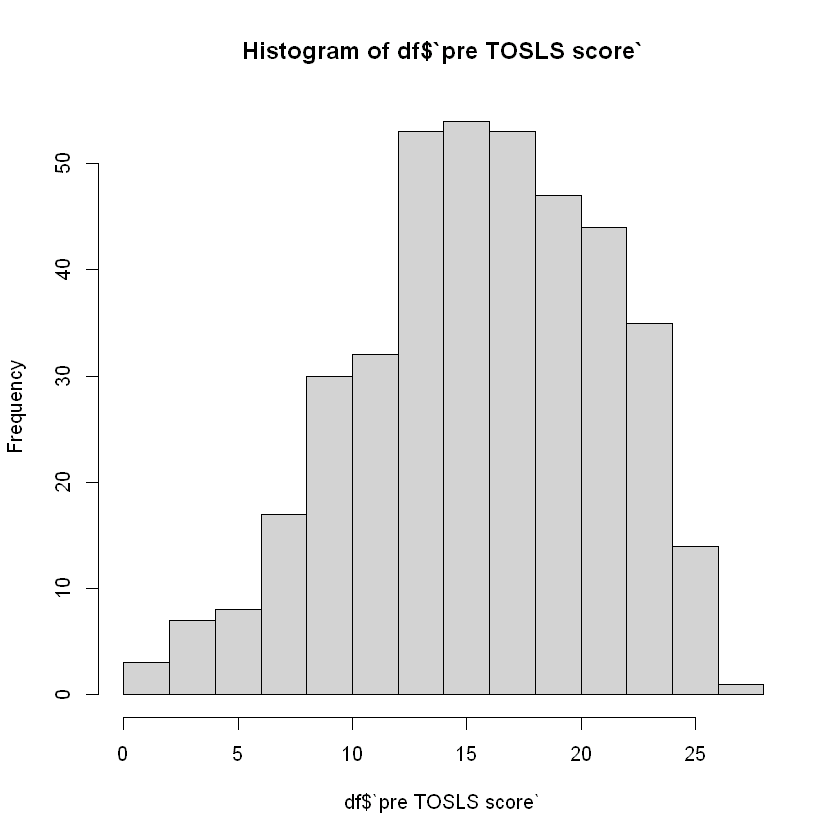

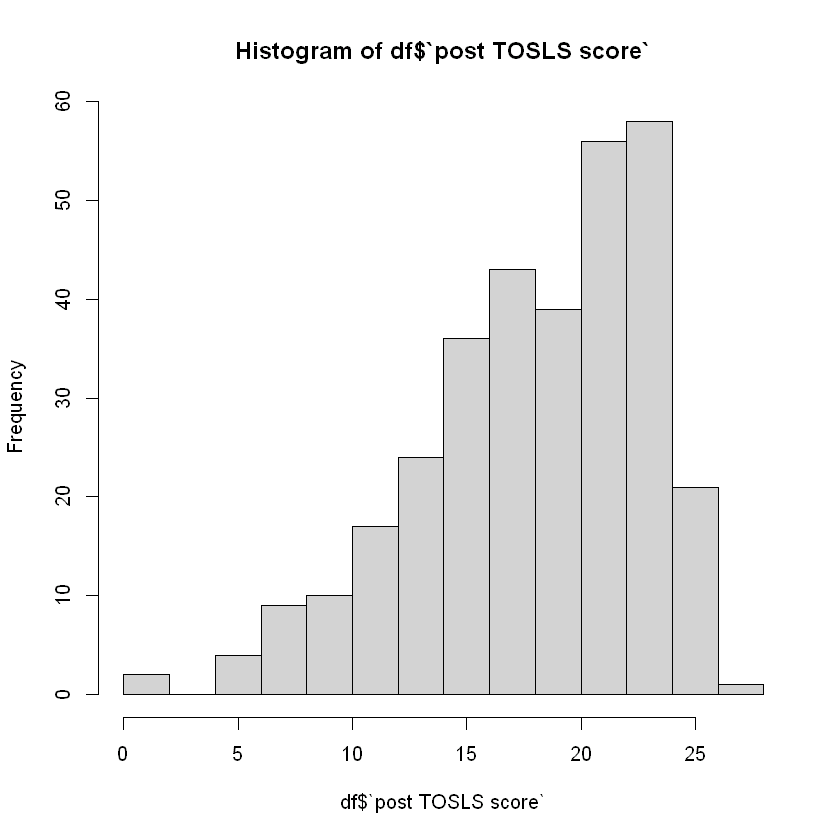

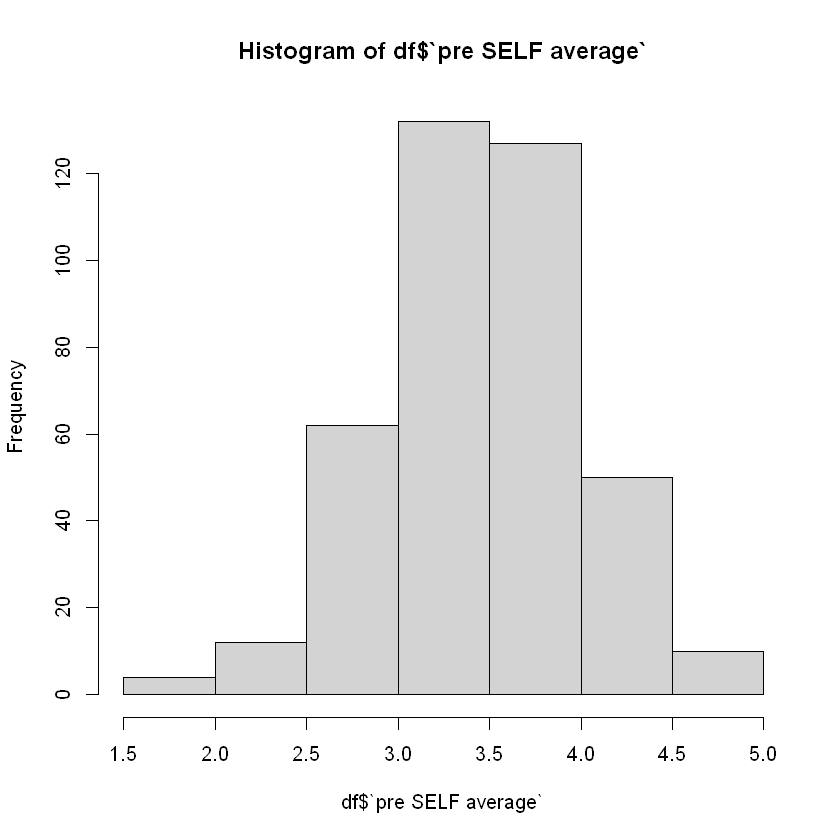

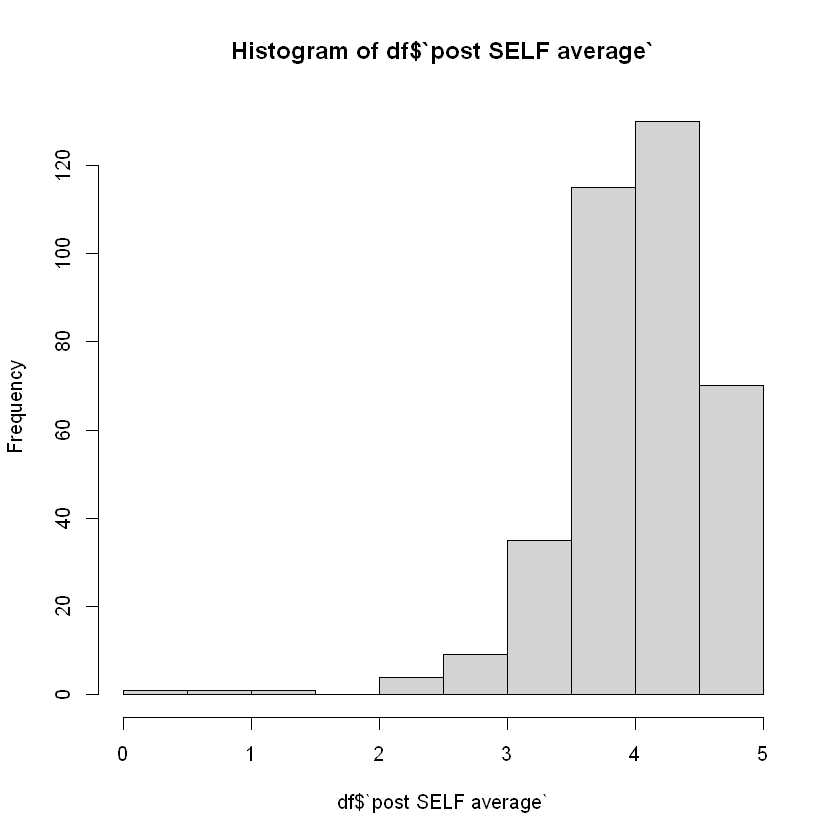

In [4]:
## Visualization of the data

hist(df$`pre TOSLS score`)
hist(df$`post TOSLS score`)

hist(df$`pre SELF average`)
hist(df$`post SELF average`)

## TOSLS Analysis

#### t-Test for TOSLS
A paired samples t-test between pre and post TOSLS score averages, which included the completed data of 319 students, determined a p-value of 7.12e-12. As this value is near zero, this implies that the difference between pre and post TOSLS scores was significant (with a significance level of 0.05). Note that a near zero probability means that the probability of getting the difference in scores indicated in the data is low if there wasn’t a significant difference between pre and post. As seen in the Figure “TOSLS Score: Paired t-Test”, the overall trend line indicates a positive relationship between pre and post scores. Students demonstrated significantly higher TOSLS scores post-instruction compared to pre-instruction.


In [15]:
## t-Test for TOSLS
t_result <- t.test(df$`pre TOSLS score`, df$`post TOSLS score`, paired = TRUE)
t_result


	Paired t-test

data:  df$`pre TOSLS score` and df$`post TOSLS score`
t = -7.1225, df = 318, p-value = 7.118e-12
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -2.724496 -1.545097
sample estimates:
mean difference 
      -2.134796 


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
"Removed 80 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 80 rows containing missing values or values outside the scale range
(`geom_point()`)."


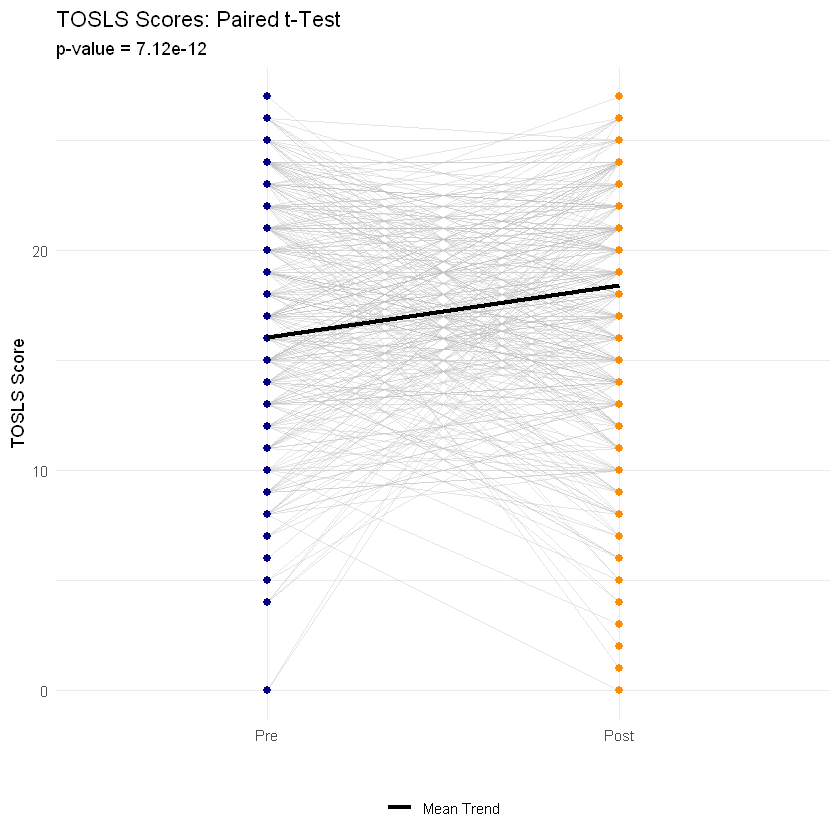

In [16]:
## --- Visualization for T-test ---
# Create long-format manually
df_tosls_long <- data.frame(
  ID = rep(1:nrow(df), each = 2),
  Time = rep(c("Pre", "Post"), times = nrow(df)),
  Score = c(df$`pre TOSLS score`, df$`post TOSLS score`)
)

df_tosls_long$Time <- factor(df_tosls_long$Time, levels = c("Pre", "Post"))

# Calculate means
mean_pre_tosls <- mean(df$`pre TOSLS score`, na.rm = TRUE)
mean_post_tosls <- mean(df$`post TOSLS score`, na.rm = TRUE)

# Prepare mean line data
trend_data <- data.frame(Time = c("Pre", "Post"),
                         Score = c(mean_pre_tosls, mean_post_tosls),
                         Group = "Mean Trend")

# Plot
ggplot(df_tosls_long, aes(x = Time, y = Score, group = ID)) +
  geom_line(alpha = 0.4, color = "gray") +
  geom_point(aes(color = Time), size = 2) +
  geom_line(data = trend_data,
            aes(x = Time, y = Score, linetype = Group, group = Group),
            color = "black", size = 1.2) +
  scale_linetype_manual(name = "Mean Line", values = c("Mean Trend" = "solid")) + 
  scale_color_manual(name = "Mean Line", values = c("Mean Trend" = "black")) + 
  scale_color_manual(values = c("Pre" = "darkblue", "Post" = "darkorange"), guide = "none") + 
  labs(title = "TOSLS Scores: Paired t-Test",
       subtitle = paste0("p-value = ", signif(t_result$p.value, 3)),
       x = "", y = "TOSLS Score") +
  theme_minimal() +
  theme(legend.title = element_blank(), 
        legend.position = "bottom")


#### TOSLS Percentage Difference

As shown in Figure “Average Pre vs Post TOSLS Scores”, the average TOSLS scores of individuals from the pre-test was 57.4%; the post-test average was 65.9%. This results in a difference of 8.5% from the pre- to the post-test. As this test was out of 28 questions, the difference is about two more questions correct in the post-test than the pre-test.

[1] 2.357798

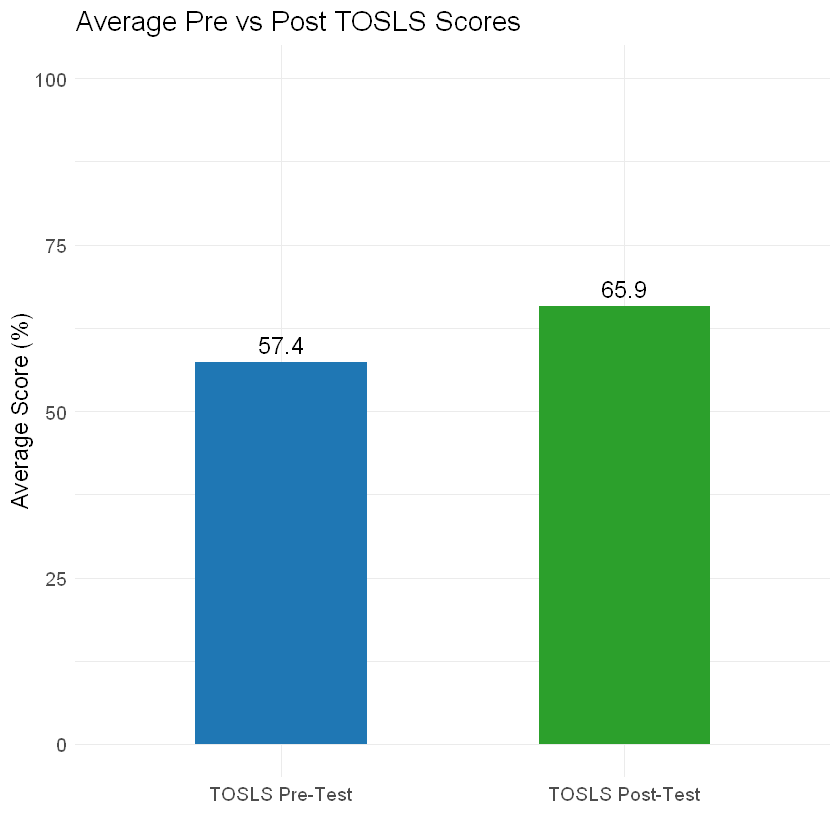

In [14]:
## --- % TOSLS on bar chart ---
avg_pre <- mean(df.std$perc_test_pre, na.rm = TRUE) 
avg_post <- mean(df.std$perc_test_post, na.rm = TRUE) 

avg_df <- data.frame(
  Test <- factor(c("TOSLS Pre-Test", "TOSLS Post-Test"), 
         levels = c("TOSLS Pre-Test", "TOSLS Post-Test")),
  Percentage = c(avg_pre*100, avg_post*100)
)

ggplot(avg_df, aes(x = Test, y = Percentage, fill = Test)) +
  geom_bar(stat = "identity", width = 0.5) +
  ylim(0, 100) +
  geom_text(aes(label = round(Percentage, 1)), vjust = -0.5, size = 5) +
  labs(title = "Average Pre vs Post TOSLS Scores",
       x = "",
       y = "Average Score (%)") +
  scale_fill_manual(values = c("TOSLS Pre-Test" = "#1f77b4", "TOSLS Post-Test" = "#2ca02c")) +
  theme_minimal() +
  theme(legend.position = "none",
        text = element_text(size = 14))

diff_avg <- avg_post - avg_pre
question_diff <- diff_avg*28
question_diff

#### Cohend's d for TOSLS
Cohen’s d is used to measure effect size by determining the standardized difference between two means. Using Cohen’s d for effect size of the TOSLS test, a more practical significance of the results can be extracted, beyond statistical significance. The Cohen’s d effect size was calculated to be 0.42, which indicates a small to medium effect size (small=0.2, medium=0.4, large=0.8). The 95% confidence interval ranges from 0.296 to 0.534, which means we can be 95% confident that the true effect size is somewhere between a small and moderate effect. Since the entire confidence interval is above 0, we can be confident that there is a real difference between the two groups — it’s not just due to random chance.

In [ ]:
## -- Effect Size --
cohen.d(df$`post TOSLS score`, df$`pre TOSLS score`, paired = TRUE, na.rm = TRUE)


Cohen's d

d estimate: 0.4151287 (small)
95 percent confidence interval:
    lower     upper 
0.2958463 0.5344112 


## Correlation for SELF
Three statistical approaches were used to determine a relationship between pre and post SELF assessment scores. These approaches used 365 of the student data in their calculations.

#### Wilcoxon Signed-Rank Test
This nonparametric test is appropriate for ordinal Likert-scale data. As seen in the Figure “SELF Assessment Scores: Wilcoxon Signed-Rank Test”, a p-value of 3.51e-41 is found. This indicates that the average ranking the students gave themselves on the pre assessment was significantly different than the average ranking they gave themselves on the post assessment. Visual inspection of the data confirms that post-SELF scores are significantly higher than pre-SELF scores.

In [11]:
wilcox_result <- wilcox.test(df$`post SELF average`, df$`pre SELF average`, 
                             paired = TRUE, alternative = "greater")
wilcox_result


	Wilcoxon signed rank test with continuity correction

data:  df$`post SELF average` and df$`pre SELF average`
V = 55766, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 35 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 35 rows containing missing values or values outside the scale range
(`geom_point()`)."


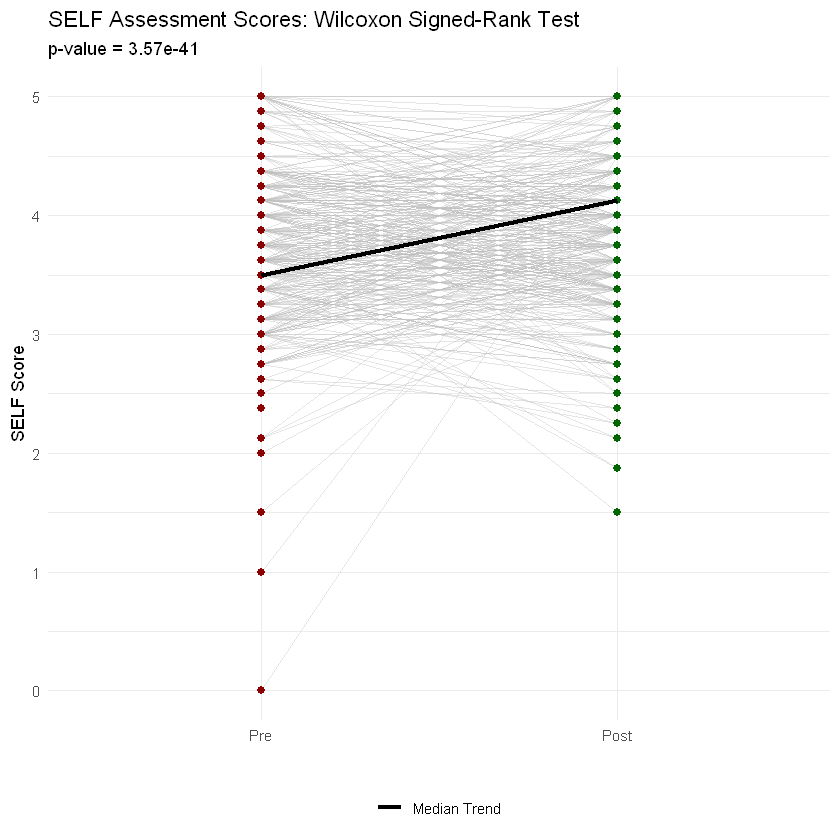

In [12]:
## --- Visualization for Wilcoxon test ---
# Create long-format
df_self_long <- data.frame(
  ID = rep(1:nrow(df), each = 2),
  Time = rep(c("Pre", "Post"), times = nrow(df)),
  Score = c(df$`pre SELF average`, df$`post SELF average`)
)

df_self_long$Time <- factor(df_self_long$Time, levels = c("Pre", "Post"))

# Calculate medians
median_pre_self <- median(df$`pre SELF average`, na.rm = TRUE)
median_post_self <- median(df$`post SELF average`, na.rm = TRUE)

# Prepare median line data
trend_data <- data.frame(Time = c("Pre", "Post"),
                         Score = c(median_pre_self, median_post_self),
                         Group = "Median Trend")

# Plot
ggplot(df_self_long, aes(x = Time, y = Score, group = ID)) +
  geom_line(alpha = 0.4, color = "gray") +
  geom_point(aes(color = Time), size = 2) +
  geom_line(data = trend_data,
            aes(x = Time, y = Score, linetype = Group, group = Group),
            color = "black", size = 1.2) +
  scale_linetype_manual(name = "", values = c("Median Trend" = "solid")) +
  scale_color_manual(values = c("Pre" = "darkred", "Post" = "darkgreen"),
                     guide = "none") +
  labs(title = "SELF Assessment Scores: Wilcoxon Signed-Rank Test",
       subtitle = paste0("p-value = ", signif(wilcox_result$p.value, 3)),
       x = "", y = "SELF Score") +
  theme_minimal() +
  theme(legend.title = element_blank(), 
        legend.position = "bottom")


#### Spearman and Kendall correlation tests
Figure “SELF Assessment Correlations” maps a line determined by the correlation values to show the overall trend of the data. The Spearman correlation value was 0.31; the Kendall correlation value was 0.22. Typically, a correlation value between 0-0.29 is considered a weak positive correlation. A correlation between 0.3-0.49 is considered a moderate positive correlation. In order to deem the correlation strong, we would expect a correlation value of 0.5-1. As these values lie in the weak to moderate range, we conclude that though the relationship is positive, the correlation between average pre assessment scores have a weak/moderate relationship with post assessment scores. 

In [13]:
spearman_r <- cor(df$`pre SELF average`, df$`post SELF average`, method = "spearman",
                  use = "complete.obs")
spearman_r
kendall_r <- cor(df$`pre SELF average`, df$`post SELF average`, method = "kendall", 
                 use = "complete.obs")
kendall_r

[1] 0.3067969

[1] 0.2225458

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 34 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 34 rows containing missing values or values outside the scale range
(`geom_point()`)."


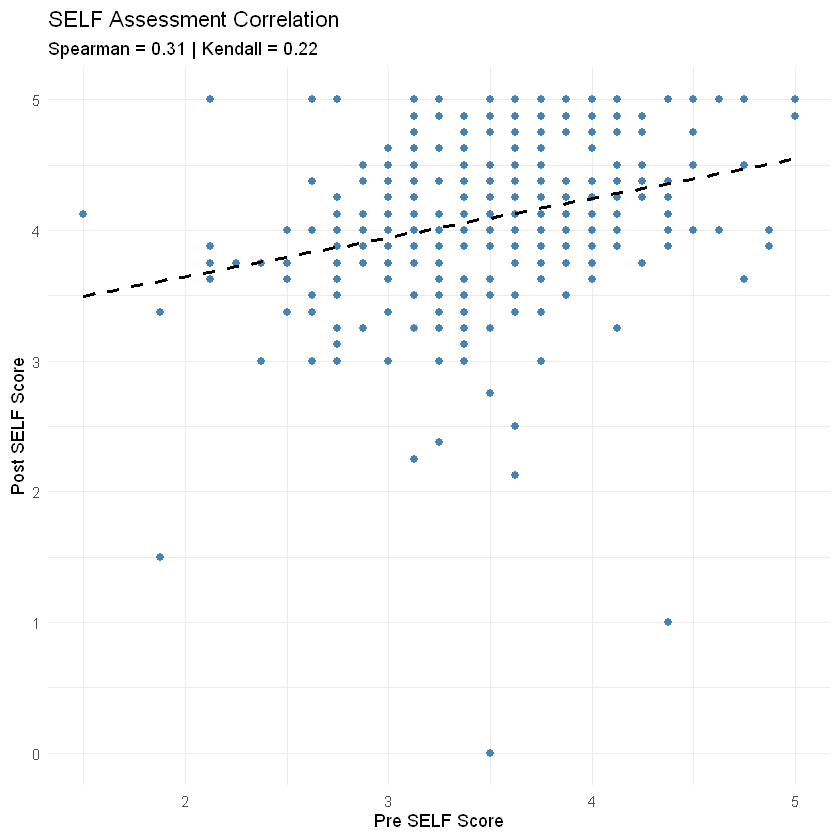

In [14]:
## --- Visualization for Correlations ---
# Plot
ggplot(df, aes(x = `pre SELF average`, y = `post SELF average`)) +
  geom_point(color = "steelblue", size = 2) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", color = "black") +
  labs(title = "SELF Assessment Correlation",
       subtitle = paste0("Spearman = ", round(spearman_r, 2), 
                         " | Kendall = ", round(kendall_r, 2)),
       x = "Pre SELF Score", y = "Post SELF Score") +
  theme_minimal()

#### SELF questions as indicators of TOSLS score
Using Spearman’s correlation coefficient, it was also determined in Figure “Spearman Correlation: Post SELF Questions vs. Post TOSLS Score” a general hierarchy of post SELF questions that would be considered better indicators of post TOSLS score. Using n=317 completed student data, it was determined that a higher self-assessment rank on Question 3 and Question 8 was correlated by 0.14 with a higher post TOSLS score. Again, by the framework described previously, a correlation value between 0-0.29 is considered weak. Therefore, though there is a slight correlation between certain self-assessment questions and TOSLS score, self-assessment questions are a weak predictor of TOSLS scores.

Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(df[[q]], df$`post TOSLS score`, method = "spear

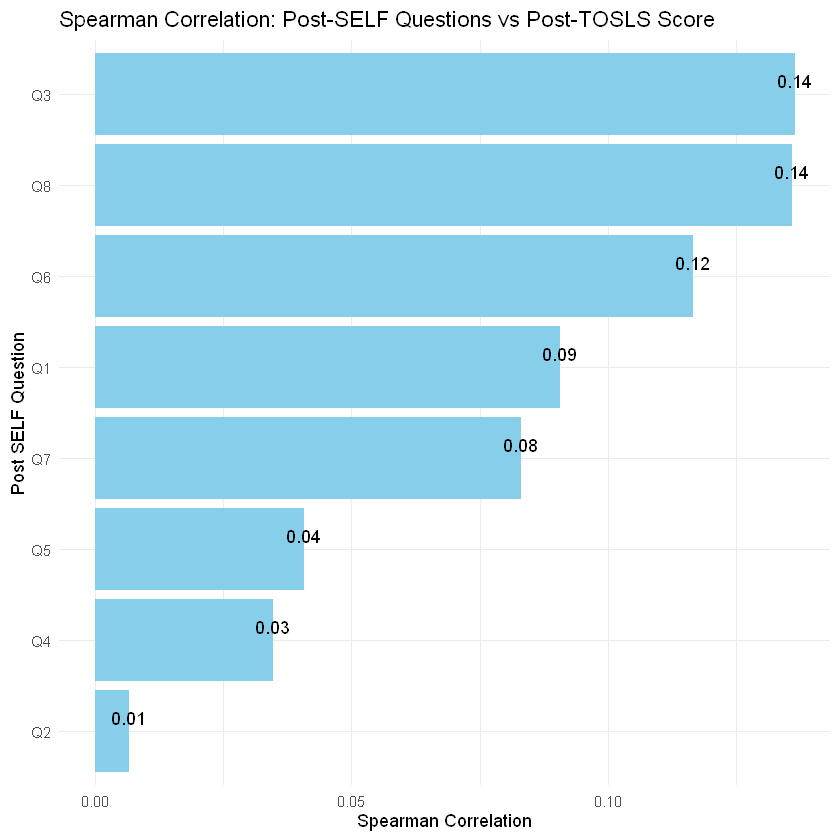

In [17]:
## --- Visualization for SELF Q's vs. TOSLS score ---
# Initialize empty list to store correlations
cor_results <- data.frame(Question = character(), 
                          Spearman = numeric(),
                          p_value = numeric(),
                          stringsAsFactors = FALSE)

# Loop over each post question
for (q in post_questions) {
  corr <- cor.test(df[[q]], df$`post TOSLS score`, method = "spearman")
  cor_results <- rbind(cor_results, 
                       data.frame(Question = q, 
                                  Spearman = corr$estimate, 
                                  p_value = corr$p.value))
}

# Clean question labels for plot
cor_results$Question <- sub(".*Q", "Q", cor_results$Question)

# Plot correlations
ggplot(cor_results, aes(x = reorder(Question, Spearman), y = Spearman)) +
  geom_col(fill = "skyblue") +
  geom_text(aes(label = round(Spearman, 2)), vjust = -0.5) +
  labs(title = "Spearman Correlation: Post-SELF Questions vs Post-TOSLS Score",
       x = "Post SELF Question",
       y = "Spearman Correlation") +
  theme_minimal() +
  coord_flip()

## Model Analysis

The main objective of this study is to identify the relationship between students’ post self-assessment and TOSLS scores. Before diving into the depths of the models, Figure “Post TOSLS Percent vs Individual Post SELF Questions” gives a general idea of how the self-assessment affects the TOSLS output for each question. This figure also divides each student into their individual class sections. It is interesting to note that Section 3 followed a similar trend for all questions: low self-assessment score related low TOSLS score and high self-assessment score related to high TOSLS score. This is not necessarily true for Section 2. As clearly illustrated in 6/8 self-assessment questions charts, low self-assessment scores were related to high TOSLS score (and vice versa).

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 8 rows containing non-finite outside the scale range (`stat_smooth()`)."
Warning message:
"Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`)."


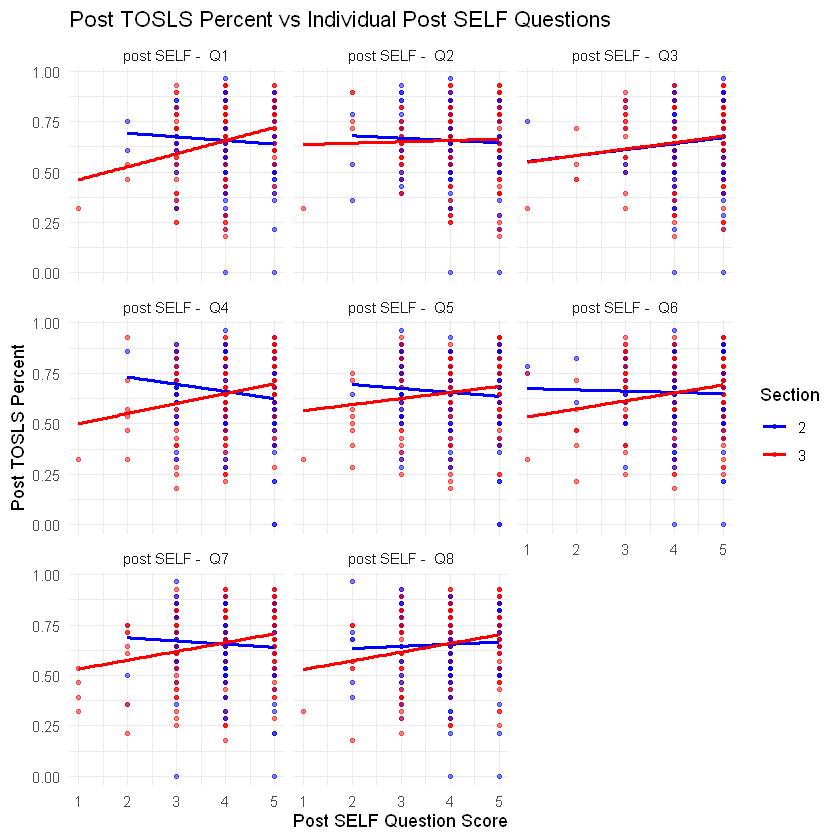

In [20]:
## --- Each SELF Q compared to TOSLS percent---

# Prepare long-format data
df_extra <- df.std[, c("perc_test_post", "Section")]
self_questions <- names(df)[grepl("^post SELF -  Q", names(df))]
df_likert <- df[, self_questions]
df_combined <- cbind(df_extra, df_likert)

df_long <- reshape(
  data = df_combined,
  varying = self_questions,
  v.names = "Score",
  timevar = "Question",
  times = self_questions,
  direction = "long"
)

df_long <- na.omit(df_long)
df_long$Section <- as.factor(df_long$Section)
df_long$Question <- as.factor(df_long$Question)

# Visualization
ggplot(df_long, aes(x = Score, y = perc_test_post, color = Section)) +
  geom_point(alpha = 0.5, size = 1.2) +
  geom_smooth(method = "lm", se = FALSE, linewidth = 1) +
  facet_wrap(~ Question, ncol = 3) +
  scale_x_continuous(breaks = 1:5, limits = c(1, 5)) +
  labs(
    title = "Post TOSLS Percent vs Individual Post SELF Questions",
    x = "Post SELF Question Score",
    y = "Post TOSLS Percent"
  ) +
  scale_color_manual(values = c("2" = "blue", "3" = "red")) +
  theme_minimal()

#### Model Creation

Two models were created to determine the relationship between post self-assessment averages and post TOSLS percentages. (Continue below for simplified explanation of models)

1. Beta Regression with Random Effects
   Let Yᵢⱼ ∈ (0,1) be the response for observation (student) j in group (section) i. The model assumes that:

   Y_ij ~ Beta(μ_ij φ,(1 - μ_ij)φ)

   This means the response Y_ij follows a Beta distribution with mean μ_ij and precision φ.

   logit(μ_ij) = x_ijᵗ β + b_i

   Here, the logit of the mean μ_ij is modeled as a linear combination of:
      * Fixed effects: x_ijᵗ β, where x_ij is a vector of covariates and β is a vector of fixed effect coefficients.
      * Random intercept: bᵢ, specific to group i, capturing variability between groups.

      b_i ~ N(0,σ_b²)

   The random intercepts bᵢ are assumed to be normally distributed with mean 0 and variance σ_b².

   Optionally, the model can include random slopes, allowing the effect of some predictors to vary across groups:

   logit(μ_ij) = x_ijᵗ β + z_ijᵗ b_i

   Where:
      * z_ij is a subset of predictors for which random slopes are modeled.
      * b_i is now a vector of random effects, typically assumed to follow a multivariate normal distribution:
      b_i ~ N(0,Σ_b)
      * Σ_b is the variance-covariance matrix of the random effects.
2. Linear Regression with Random Effects (Linear Mixed Model)
   Let Yᵢⱼ ∈ R be the response for observation j in group i. The model is:

   Y_ij = x_ijᵗ β + b_i + ε_ij

   This equation represents a linear mixed model where:

      * x_ijᵗ β is the fixed effect component.
      * b_i is the random intercept for group i, capturing group-level variability.
      * ε_ij is the residual error term.
      b_i ~ N(0,σ_b²)
      ε_ij ~ N(0,σ²)
   The random intercepts and residuals are normally distributed with their respective variances.
   When modeling random slopes, the model becomes:

   Y_ij = x_ijᵗ β + z_ijᵗ b_i + ε_ij   

   Where:
      * z_ij is a subset of covariates with random slopes.
      * b_i is a vector of random effects, assumed to follow:
      b_i ~ N(0,Σ_b)
      * Σ_b is the variance-covariance matrix of the random effects, capturing both variances and covariances.

#### Model Creation Explanation

With all that jargon above, it seems necessary to provide a layman’s response.

The data can be modeled in two ways: a linear regression model or a beta regression model. Typically, a linear model is the most straight forward; the response variable (TOSLS score) can be anywhere between negative infinity and positive infinity. A linear regression model then takes the effect of the self-assessment and maps it with the response of the TOSLS score. In our case, in order to account for possible between-sections-variability, a random-effects intercept was added. For a beta regression model, the main difference is that the responses are designed to only contain values between 0 and 1. For the case of TOSLS percentages, this regression seems practical, as all test scores will be proportions between 0 and 1. Again, with adding the random-effects intercept, the beta regression model attempts to catch possible between-class variability. Note that by including the random effects, the models become mixed linear/beta models. Visual representations of the models are shown in Figure “Mixed Linear Model: Post TOSLS Percent vs Post SELF Average” and Figure “Mixed Beta Model: Percentage TOSLS vs Post SELF Average (by Section)”.

#### Model Comparison

After establishing the two models, tests were run to determine which of the two models was a better fit for modeling the data. Three model comparison techniques were used: AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and R^2 (Model Explanatory Power). A low AIC indicates a balance of fit and complexity in a model. A low BIC indicates low complexity, penalizing complexity more than AIC. A high Marginal R^2 indicates that the fixed effects explain the model’s variance. To find the better model, we are looking for low AIC, low BIC, and high Marginal R^2.
	
The mixed beta regression model had an AIC of -171.6460. The mixed linear regression model had an AIC of -164.8495. As the mixed beta regression model, the AIC states that it is the better model.
	
The mixed beta regression model had a BIC of -156.6104. The mixed linear regression model had a BIC of -149.8139. As the mixed beta regression model, the BIC states that it is the better model.
	
The mixed beta regression model had a Marginal R^2 of 0.025. The mixed linear regression model had a Marginal R^2 of 0.0095. Though the difference between the models is small, the mixed beta regression model accounts for 2.5% of the error, while the mixed linear regression model accounts for less than 1% of the error. Note that these are incredibly low numbers and are indicators that the models we have, though the best we can get, still do a poor job at explaining the error. They don’t fit the data well.

Overall, because the mixed beta regression model was considered a better fit by 3/3 model comparison techniques, we can claim it is the better model. With that in mind, we will use the results of the model to determine relationships.

#### Model Summary

In the summary of the mixed beta regression model, we learn that when the post SELF average is zero, the predicted proportion correct on the test is approximately 0.26. This represents the intercept of the model and reflects the expected test score when the predictor is at its baseline value (after standardization, this may correspond to the mean).

For each 1-unit increase in post SELF average, the predicted test proportion increases by approximately 0.077. However, this effect is not statistically significant (p = 0.306), meaning there is no strong evidence that post SELF average is meaningfully associated with test performance in this model.

The model includes a random intercept for Section, allowing test performance to vary across different sections. However, the estimated variance for this random effect is extremely small (~0.00000000006), with a standard deviation near zero.

This indicates that there is virtually no meaningful difference in test performance between sections. In practical terms, students' test scores do not appear to vary systematically based on which section they were in. The inclusion of the random effect does not improve the model’s explanatory power, suggesting that Section has little to no impact on the outcome variable in this dataset.

## TOSLS Breadth of Life Science Objectives

Expressed in the Table below is the percentages per objective of how both sections combined scored on the pre TOSLS and post TOSLS. A two-proportion z-test was used to determine if the difference between the pre and post-test were significant. As show, the p-values are all greatly below the desired confidence level of 95%. We can thus conclude that significant progress was made in all BLS objectives. Note that this analysis was done on data pulled from both sections, with removing students that previously opted out. As this data is generalized to the section and otherwise deidentified, no students were removed.

In [3]:
## 2 proportion z-test on Change in TOSLS per BLS objective

# -----------------------------
# Environment Setup
# -----------------------------
rm(list = ls())

# Load necessary libraries
library(readxl)
library(dplyr)
library(tidyverse)
library(janitor)
library(knitr)
library(purrr)

# -----------------------------
# Load and Clean Data
# -----------------------------
df <- read_excel("C:/Users/laure/Desktop/scientific_literacy/for_jupyter/data.xlsx",
                 sheet = "Sheet3")

# Clean column names for easier reference
df <- df %>% clean_names()

# -----------------------------
# Statistical Analysis
# -----------------------------
# Perform a 2-proportion z-test for each row
df <- df %>%
  mutate(
    p_value = pmap_dbl(
      list(pre_sum_correct, pre_total, post_sum_correct, post_total),
      function(pre_s, pre_n, post_s, post_n) {
        prop.test(x = c(pre_s, post_s), n = c(pre_n, post_n), correct = FALSE)$p.value
      }
    )
  )

# -----------------------------
# Format and Display Results
# -----------------------------
pretty_df <- df %>%
  mutate(
    `Pre %` = round(pre_sum_correct / pre_total, 3),
    `Post %` = round(post_sum_correct / post_total, 3),
    `P-value` = signif(p_value, 3),
    `Significant?` = case_when(
      p_value < 0.001 ~ "*** (p < .001)",
      p_value < 0.01  ~ "** (p < .01)",
      p_value < 0.05  ~ "* (p < .05)",
      TRUE ~ "No"
    )
  ) %>%
  select(Name = 1, `Pre %`, `Post %`, `P-value`, `Significant?`)

# Display results in a formatted table
kable(pretty_df, align = 'lcccl',
      caption = "Pre/Post Percentages and Significance Test Results")



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.5.1"
Warning message:
"package 'readr' was built under R version 4.5.1"
Warning message:
"package 'forcats' was built under R version 4.5.1"
Warning message:
"package 'lubridate' was built under R version 4.5.1"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.2     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"pa



Table: Pre/Post Percentages and Significance Test Results

|Name  | Pre % | Post % | P-value  |Significant?   |
|:-----|:-----:|:------:|:--------:|:--------------|
|BLS 1 | 0.664 | 0.769  | 0.000000 |*** (p < .001) |
|BLS 3 | 0.521 | 0.586  | 0.000000 |*** (p < .001) |
|BLS 4 | 0.619 | 0.669  | 0.000757 |*** (p < .001) |